# IMPORT Basic MOdUlE

# The Notebook's Information

Sentiment Analysis involves using computational methods to determine whether a piece of writing expresses a positive, negative, or neutral sentiment. It is also referred to as opinion mining, which involves identifying the opinion or attitude of a speaker.

This notebook will demonstrate various techniques for conducting sentiment analysis on Amazon food reviews using Python.

Please feel free to explore the notebook according to your requirements. If you find it helpful, consider giving it an upvote so that it can reach a wider audience, and to motivate me to create more interesting notebooks.

Content:
1. Introduction to Sentiment Analysis
2. Dataset Overview and Exploration
3. Reducing Dataset Size through Undersampling
4. Text Preprocessing Fundamentals with NLTK
5. Sentiment Analysis using NLTK's Opinion Lexicon
6. VADER: A Tool for Sentiment Scoring

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('opinion_lexicon')
plt.style.use('ggplot')

[nltk_data] Error loading opinion_lexicon: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [2]:
data=pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Descriptive variable names:

1. Id: Unique review identifier
2. ProductId: Product identifier being reviewed
3. UserId: Identifier of the user who wrote the review
4. ProfileName: Name of the user's profile
5. HelpfulnessNumerator: Number of users who found the review helpful
6. HelpfulnessDenominator: Total number of users who voted on the review's helpfulness
7. Score: User's rating on a 1-5 scale
8. Time: Review timestamp in Unix time format
9. Summary: Brief review summary or title
10. Text: Full review text content

In [3]:
data.shape

(568454, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
review_count=data.Score.value_counts()
review_count

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

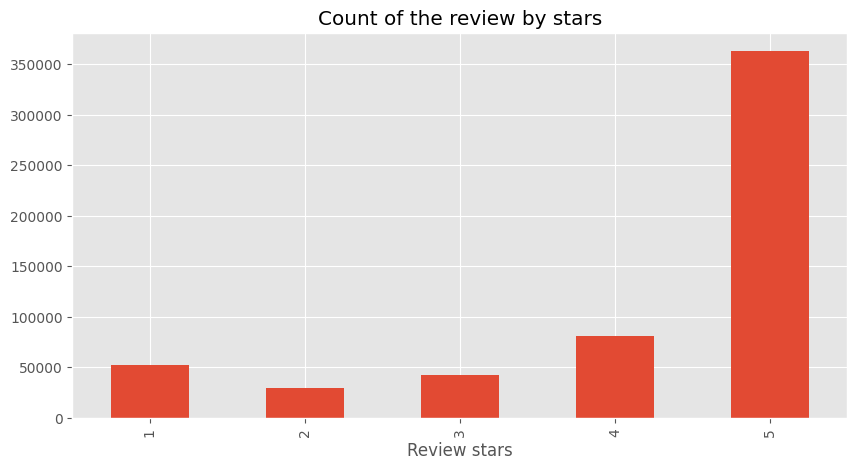

In [6]:
# knowing the distribution of 5 categories
ap=review_count.sort_index().plot(kind='bar',title='Count of the review by stars',figsize=(10,5))
ap.set_xlabel('Review stars')
plt.show()

In [7]:
len(data['Id'].value_counts(dropna=False))

568454

# Balanced Corpus Creation:
To create a smaller, balanced dataset, we will undersample the reviews by randomly selecting:

- 1500 reviews with a rating of 1 (extremely negative)
- 500 reviews with a rating of 2 (negative)
- 500 reviews with a rating of 3 (neutral)
- 500 reviews with a rating of 4 (positive)
- 1500 reviews with a rating of 5 (extremely positive)

This sampling strategy ensures a more balanced distribution of ratings, allowing us to work with a manageable and representative corpus.

In [8]:
one_1500=data[data['Score']==1].sample(n=1500)
two_500=data[data['Score']==2].sample(n=500)
three_500=data[data['Score']==3].sample(n=500)
four_500=data[data['Score']==4].sample(n=500)
five_1500=data[data['Score']==5].sample(n=1500)

In [9]:
undersampled_reviews = pd.concat([one_1500, two_500, three_500, four_500, five_1500], axis=0)

<Axes: xlabel='Score', ylabel='count'>

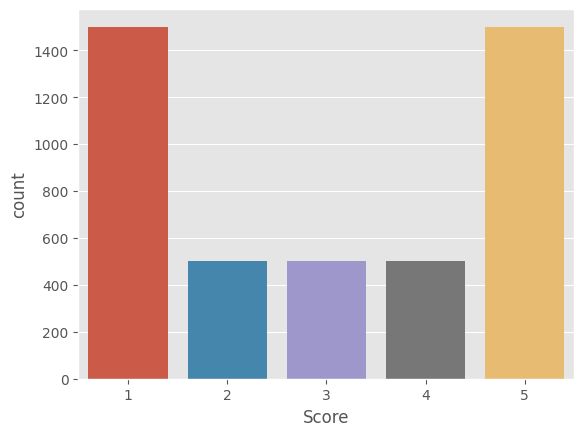

In [10]:
sns.countplot(data=undersampled_reviews, x='Score')

# Random Sampling of 100K Reviews

In [11]:
sample_100K_revs = data.sample(n=100000, random_state=42)
sample_100K_revs.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
165256,165257,B000EVG8J2,A1L01D2BD3RKVO,"B. Miller ""pet person""",0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...
231465,231466,B0000BXJIS,A3U62RE5XZDP0G,Marty,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...
427827,427828,B008FHUFAU,AOXC0JQQZGGB6,Kenneth Shevlin,0,2,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...
433954,433955,B006BXV14E,A3PWPNZVMNX3PA,rareoopdvds,0,1,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin..."
70260,70261,B007I7Z3Z0,A1XNZ7PCE45KK7,Og8ys1,0,2,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...


# Writing Corpora

In [12]:
# small corpus
undersampled_reviews.to_csv("/kaggle/working/small_corpus.csv", index=False)


In [13]:

# big corpus
sample_100K_revs.to_csv("/kaggle/working/big_corpus.csv", index=False)

# Basic Text Processing using NLTK

In [14]:
reviews=undersampled_reviews
reviews.shape

(4500, 10)

In [15]:
example = reviews['Text'].iloc[49]
print(example)

Quick, someone please hand me a towel so I can wipe this off my tongue.  The can says: "It's what soda should always have been".  If all "regular" sodas were like this, sodas would be only tolerated, not drunk by the gallons by a large percentage of the population.  That's not to say that "regular" sodas are good, I don't like them anymore either since eliminating high fructose corn syrup from my diet.  This has a very bland taste & a horrible cling-to-the-back-of-the-tongue aftertaste.  I use stevia all the time & was surprised at the odd flavor.  This also does not taste anything like Mt. Dew.


In [16]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Quick', ',', 'someone', 'please', 'hand', 'me', 'a', 'towel', 'so', 'I']

In [17]:
# part of speech tagging
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Quick', 'NNP'),
 (',', ','),
 ('someone', 'NN'),
 ('please', 'NN'),
 ('hand', 'NN'),
 ('me', 'PRP'),
 ('a', 'DT'),
 ('towel', 'NN'),
 ('so', 'IN'),
 ('I', 'PRP')]

In [18]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (GPE Quick/NNP)
  ,/,
  someone/NN
  please/NN
  hand/NN
  me/PRP
  a/DT
  towel/NN
  so/IN
  I/PRP
  can/MD
  wipe/VB
  this/DT
  off/RP
  my/PRP$
  tongue/NN
  ./.
  The/DT
  can/MD
  says/VBZ
  :/:
  ``/``
  It/PRP
  's/VBZ
  what/WP
  soda/NN
  should/MD
  always/RB
  have/VB
  been/VBN
  ''/''
  ./.
  If/IN
  all/DT
  ``/``
  regular/JJ
  ''/''
  sodas/NNS
  were/VBD
  like/IN
  this/DT
  ,/,
  sodas/VB
  would/MD
  be/VB
  only/RB
  tolerated/VBN
  ,/,
  not/RB
  drunk/VBN
  by/IN
  the/DT
  gallons/NNS
  by/IN
  a/DT
  large/JJ
  percentage/NN
  of/IN
  the/DT
  population/NN
  ./.
  That/DT
  's/VBZ
  not/RB
  to/TO
  say/VB
  that/IN
  ``/``
  regular/JJ
  ''/''
  sodas/NNS
  are/VBP
  good/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  them/PRP
  anymore/RB
  either/DT
  since/IN
  eliminating/VBG
  high/JJ
  fructose/JJ
  corn/NN
  syrup/NN
  from/IN
  my/PRP$
  diet/NN
  ./.
  This/DT
  has/VBZ
  a/DT
  very/RB
  bland/JJ
  taste/NN
  &/CC
  a/DT
  horrible/JJ
  cling-

# Sentiment Scoring using NLTK Opinion Lexicon

In [19]:

import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize, sent_tokenize
from string import punctuation
from nltk.tokenize import TreebankWordTokenizer


In [20]:
pos_words = list(opinion_lexicon.positive())
neg_words = list(opinion_lexicon.negative())

In [21]:
def get_sentiment_score_oplex(text):
    
    """
        This method returns the sentiment score of a given text using nltk opinion lexicon.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """    
    total_score = 0

    raw_sentences = sent_tokenize(text)
    
    for sentence in raw_sentences:

        sent_score = 0     
        sentence = str(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        for token in tokens:
            sent_score = sent_score + 1 if token in pos_words else (sent_score - 1 if token in neg_words else sent_score)
        total_score = total_score + (sent_score / len(tokens))

    
    return total_score

In [22]:
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
401373,401374,B000CQG8B2,A10Q7DZ2RN5JSU,M. Lyons,0,0,1,1317340800,Blegh,It's bland while you're drinking it without an...
441327,441328,B004UEKLZ6,A34WZL424RJLGD,"Carol G. Kaplan ""bytheseatofmypants""",1,2,1,1342569600,Don't buy through Amazon buy at grocery store,Apparently Karo sold to food service companies...
101933,101934,B0031UBXDE,A1EB65JZ9FBB5L,busymom09,4,8,1,1283299200,Great but WAY overpriced!,My daughter LOVES Ella's Kitchen. The food is...
479534,479535,B000TMZR98,A18DM6R5C0QH1P,Sara Wanous,0,0,1,1281657600,"Very Disappointed, Not Durable at All",I bought this toy because it touted being the ...
324192,324193,B002QO87TY,A1BFPW6FP0DPNF,Petite Fleur,0,0,1,1320624000,"Higher Price, Very little Taste!",I love cheese straws! Anytime I can find them...


In [23]:
# dropping any missing values from the targetted text column
reviews.dropna(subset=['Text'], inplace=True)
reviews.shape

(4500, 10)

In [24]:
reviews['oplex_sentiment_score'] = reviews['Text'].apply(lambda x: get_sentiment_score_oplex(x))

In [25]:
reviews[['Text','oplex_sentiment_score']].sample(2)

,Text,oplex_sentiment_score
275837,Postum is great! It tastes good and has no caf...,0.177778
451960,"Keaton was amazing in BEETLEJUICE, one of Tim ...",0.034188


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


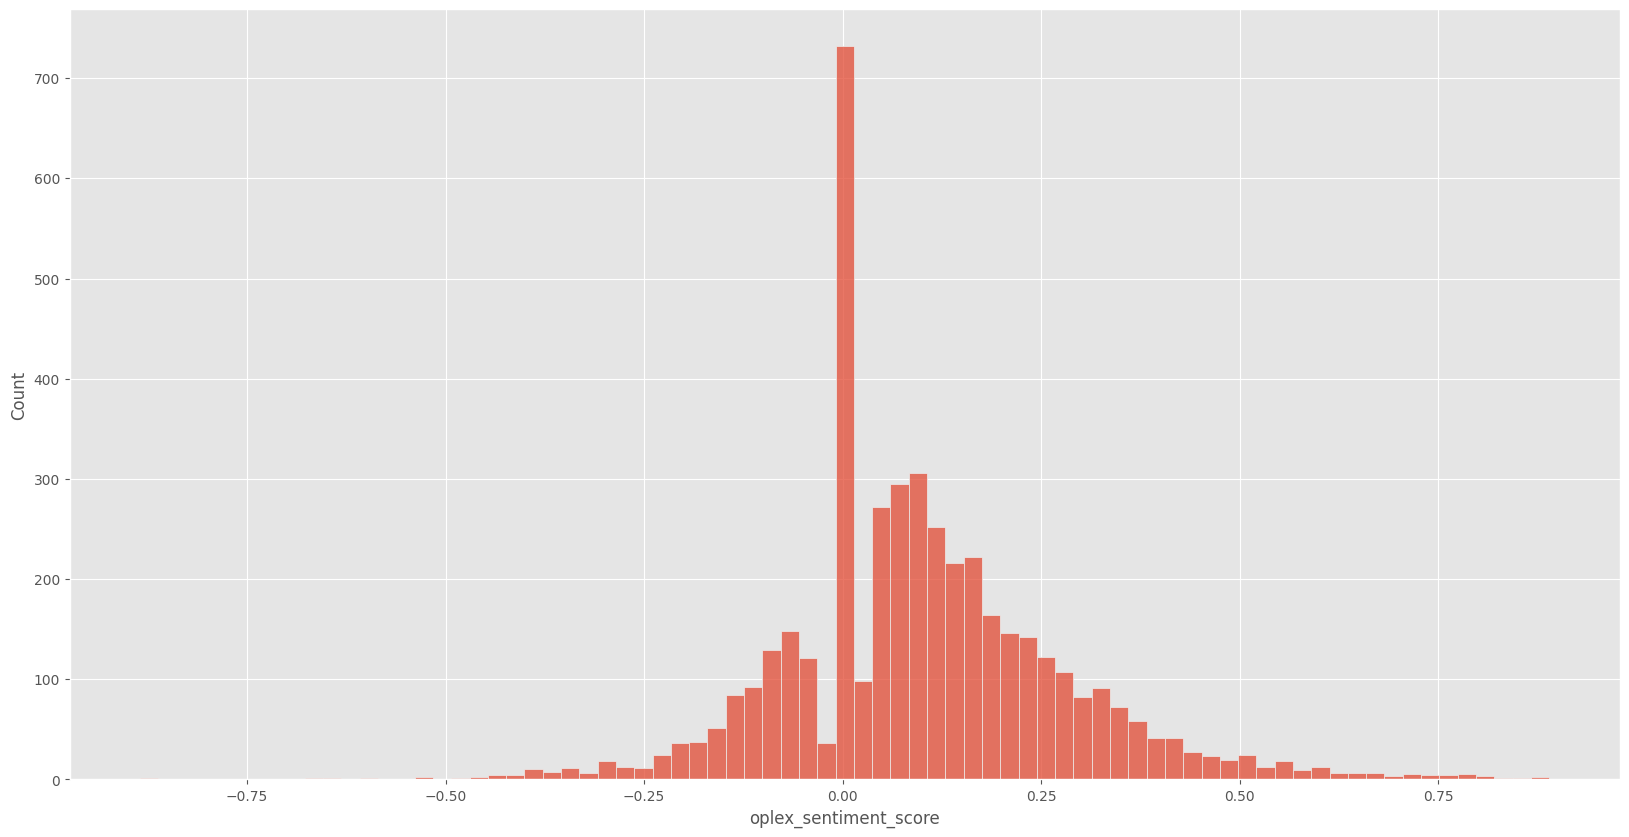

In [26]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(x='oplex_sentiment_score',\
             data=reviews.query("oplex_sentiment_score < 1 and oplex_sentiment_score>-1"), ax=ax)
plt.show()

In [27]:
reviews['oplex_sentiment'] = \
    reviews['oplex_sentiment_score'].apply(lambda x: "positive" if x>0.1 else ("negative" if x<0 else "neutral"))

<Axes: xlabel='Score', ylabel='count'>

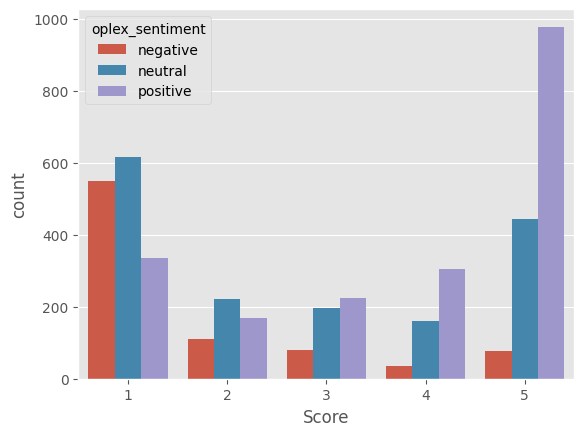

In [28]:
sns.countplot(x='Score', hue='oplex_sentiment' ,data = reviews)

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='oplex_sentiment', ylabel='Score'>

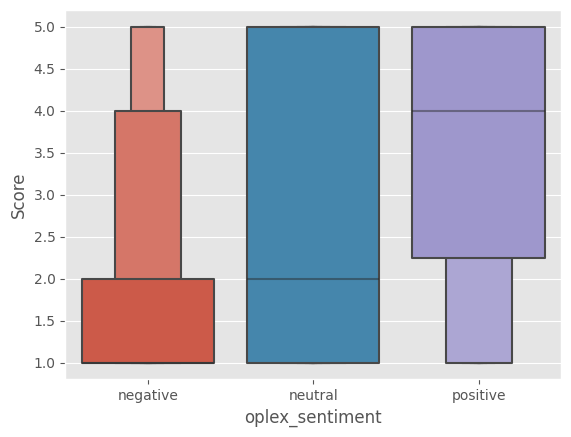

In [29]:
sns.boxenplot(x='oplex_sentiment', y='Score', data = reviews)

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

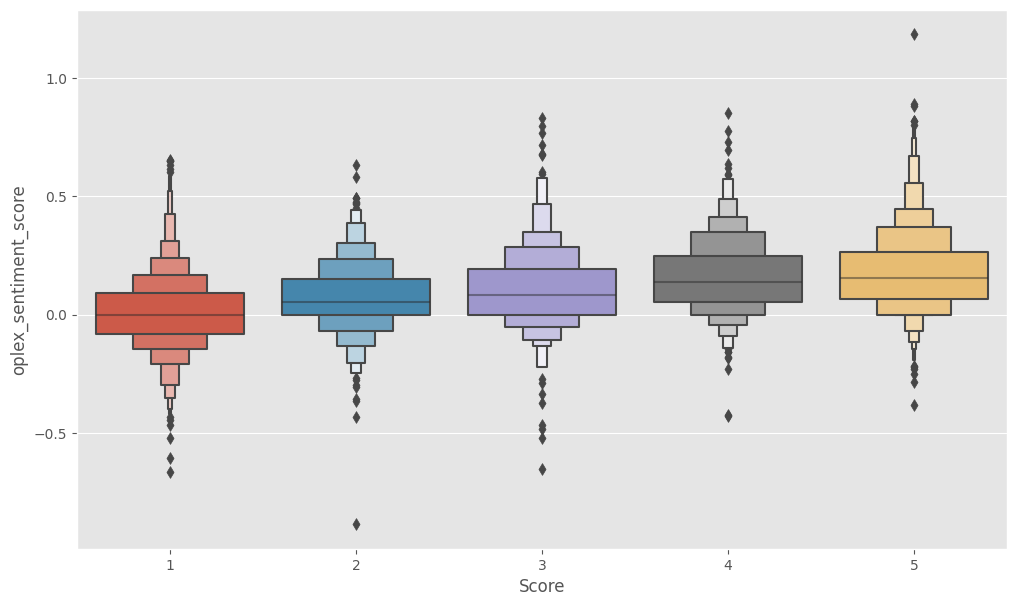

In [30]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,7))
sns.boxenplot(x='Score', y='oplex_sentiment_score', data = reviews, ax=ax)
plt.show()

In [31]:
reviews['true_sentiment'] = \
    reviews['Score'].apply(lambda x: "positive" if x>=4 else ("neutral" if x==3 else "negative"))

In [32]:
y_true = reviews['true_sentiment'].tolist()

In [33]:
y_oplex_pred = reviews['oplex_sentiment'].tolist()

In [34]:
from sklearn.metrics import confusion_matrix
oplex_cm = confusion_matrix(y_true, y_oplex_pred)

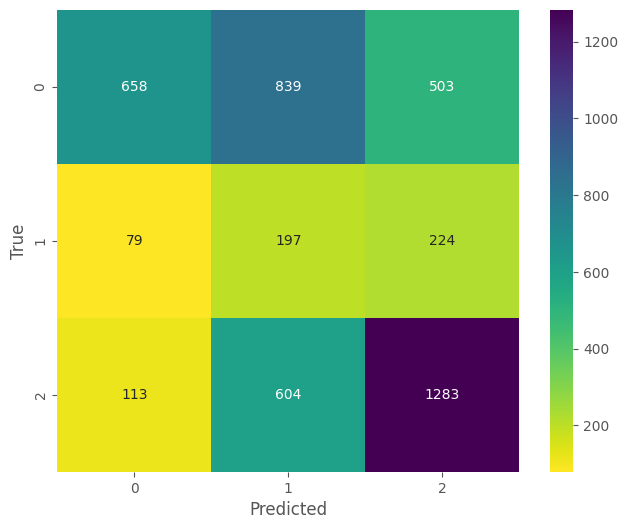

In [35]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.heatmap(oplex_cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');

In [36]:

oplex_cm = list(oplex_cm.ravel())

In [37]:
oplex_cm

[658, 839, 503, 79, 197, 224, 113, 604, 1283]

In [38]:
tp, tn, fp, fn = 1198, 654+870+79+187, 476+234, 157+645

# Positive Label Assessment

In [39]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.599
precission: 0.6278825995807128
f1 score: 0.6131013306038895


# Negative Lable Assessment

In [40]:
tp, tn, fp, fn = 654, 187+234+645+1198, 79+157, 870+476
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.327
precission: 0.7348314606741573
f1 score: 0.45259515570934256


# VADER Sentiment Scoring

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a sentiment analysis tool designed for social media content, but also effective for other domains. Its key features include:

- Lexicon-based approach: Uses a pre-defined dictionary with sentiment scores for each word.
- Rule-based scoring: Applies rules to calculate overall sentiment, considering factors like negations, punctuation, capitalization, and emoticons.
- Social media focus: Effective at capturing sentiments in social media posts with informal language, slang, and emoticons.
- Efficiency: Lightweight option, consuming fewer resources compared to machine learning models.

We will use NLTK's SentimentIntensityAnalyzer, which employs a "bag of words" approach:

- Removes stop words
- Scores each word and combines them for a total score

This tool provides negative, neutral, and positive scores for text, offering a simple and efficient sentiment analysis solution.

In [41]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [42]:
sia.polarity_scores("I am so happy after eating cremica's dark chocolate brownie!")

{'neg': 0.0, 'neu': 0.651, 'pos': 0.349, 'compound': 0.6468}

In [43]:
sia.polarity_scores('This is the worst thing I have ever eaten.')

{'neg': 0.369, 'neu': 0.631, 'pos': 0.0, 'compound': -0.6249}

In [44]:
example = reviews['Text'].iloc[20]
sia.polarity_scores(example)

{'neg': 0.098, 'neu': 0.798, 'pos': 0.103, 'compound': -0.1788}

In [45]:
# Grabbing the polarity scores on the small corpus
res = {}
for i, row in tqdm(reviews.iterrows(), total=len(reviews)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/4500 [00:00<?, ?it/s]

In [46]:
pd.DataFrame(res)

,401374,441328,101934,479535,324193,228774,309148,549872,310573,22646,...,551941,150029,376902,438234,185509,417683,341248,341230,405263,391758
neg,0.1490,0.034,0.0460,0.013,0.0260,0.1030,0.1340,0.0420,0.146,0.0900,...,0.0890,0.0250,0.0240,0.0150,0.0000,0.0310,0.0000,0.0320,0.0000,0.0280
neu,0.8510,0.899,0.8510,0.854,0.8980,0.8460,0.8090,0.7920,0.735,0.7420,...,0.8400,0.8260,0.6090,0.7670,0.7410,0.7470,0.8270,0.7600,0.5210,0.8980
pos,0.0000,0.067,0.1030,0.133,0.0760,0.0520,0.0570,0.1650,0.119,0.1680,...,0.0710,0.1500,0.3670,0.2190,0.2590,0.2210,0.1730,0.2080,0.4790,0.0740
compound,-0.5423,0.128,0.5596,0.902,0.8309,-0.8895,-0.5594,0.9555,0.298,0.3818,...,-0.1172,0.8949,0.9623,0.9476,0.9577,0.9138,0.8261,0.9455,0.9403,0.6209


In [47]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(reviews, how='left')

In [48]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,oplex_sentiment_score,oplex_sentiment,true_sentiment
0,401374,0.149,0.851,0.000,-0.5423,B000CQG8B2,A10Q7DZ2RN5JSU,M. Lyons,0,0,1,1317340800,Blegh,It's bland while you're drinking it without an...,-0.076923,negative,negative
1,441328,0.034,0.899,0.067,0.1280,B004UEKLZ6,A34WZL424RJLGD,"Carol G. Kaplan ""bytheseatofmypants""",1,2,1,1342569600,Don't buy through Amazon buy at grocery store,Apparently Karo sold to food service companies...,0.000000,neutral,negative
2,101934,0.046,0.851,0.103,0.5596,B0031UBXDE,A1EB65JZ9FBB5L,busymom09,4,8,1,1283299200,Great but WAY overpriced!,My daughter LOVES Ella's Kitchen. The food is...,-0.076923,negative,negative
3,479535,0.013,0.854,0.133,0.9020,B000TMZR98,A18DM6R5C0QH1P,Sara Wanous,0,0,1,1281657600,"Very Disappointed, Not Durable at All",I bought this toy because it touted being the ...,0.428571,positive,negative
4,324193,0.026,0.898,0.076,0.8309,B002QO87TY,A1BFPW6FP0DPNF,Petite Fleur,0,0,1,1320624000,"Higher Price, Very little Taste!",I love cheese straws! Anytime I can find them...,-0.045198,negative,negative


# Plot VADER results

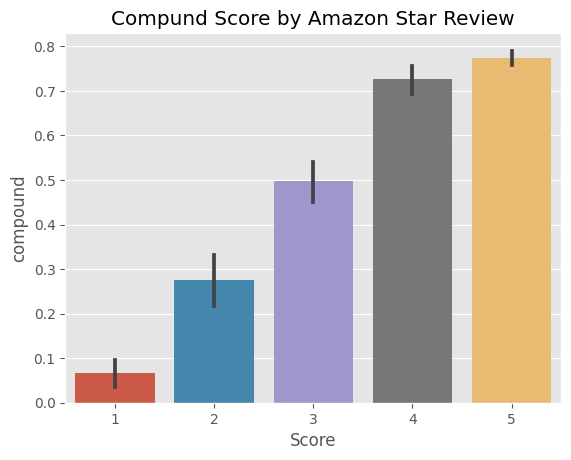

In [49]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

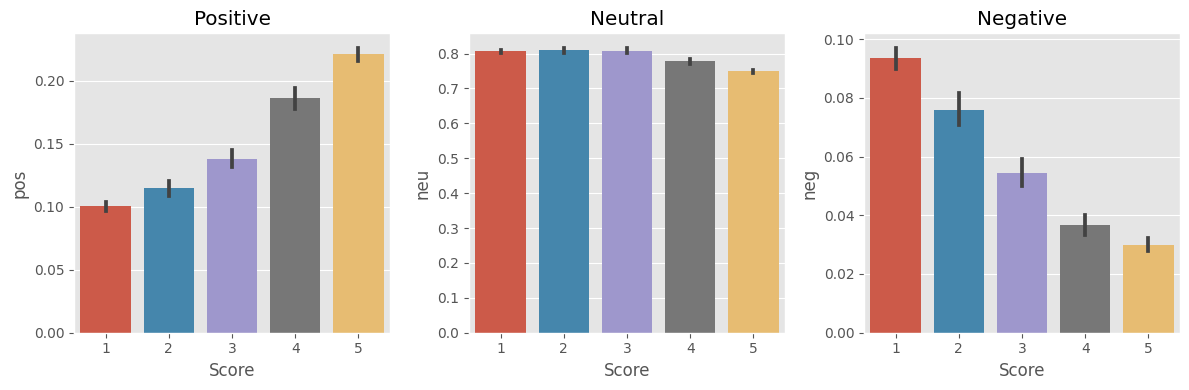

In [50]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()